<a href="https://colab.research.google.com/github/MussaddikKhan/Data-Science-College-Practicals-/blob/main/CustomerGrivence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (5, 5)
     Age  Gender Shopping_Frequency       Grievance_Type Satisfaction_Level
0  26-35    Male             Weekly        Late Delivery       Dissatisfied
1  18-25  Female            Monthly      Product Quality            Neutral
2  36-45    Male             Rarely  Wrong Item Received          Satisfied
3  46-60  Female             Weekly     Customer Service       Dissatisfied
4  26-35  Female            Monthly        Payment Issue            Neutral

--- Statistical Analysis ---
Mean:
 Age                   1.4
Gender                0.4
Shopping_Frequency    1.0
Grievance_Type        2.0
Satisfaction_Level    0.8
dtype: float64

Median:
 Age                   1.0
Gender                0.0
Shopping_Frequency    1.0
Grievance_Type        2.0
Satisfaction_Level    1.0
dtype: float64

Mode:
 Age                   1.0
Gender                0.0
Shopping_Frequency    0.0
Grievance_Type        0.0
Satisfaction_Level    0.0
Name: 0, dtype: float64


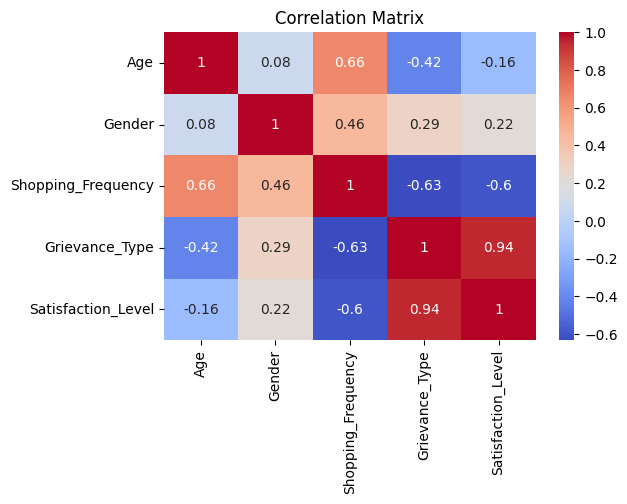

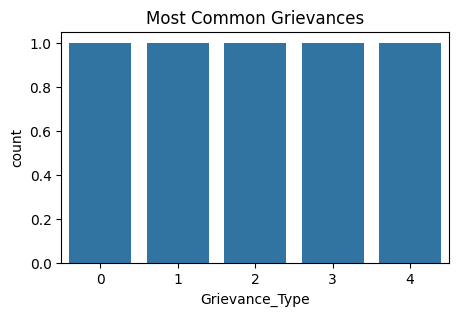

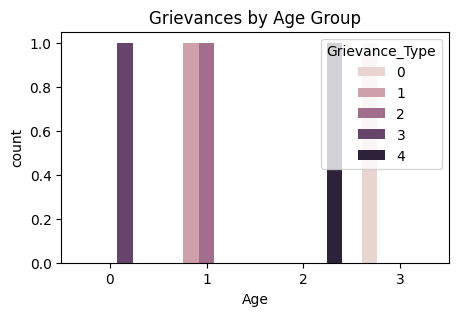

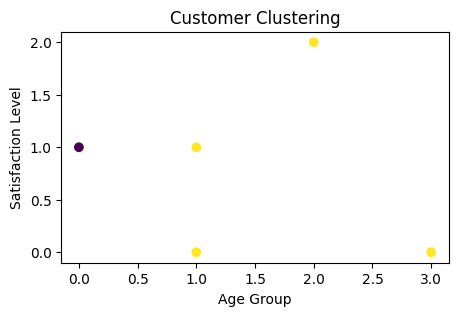


--- Decision Tree ---
Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


--- Random Forest ---
Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


--- Gradient Boosting ---
Accuracy: 0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2  

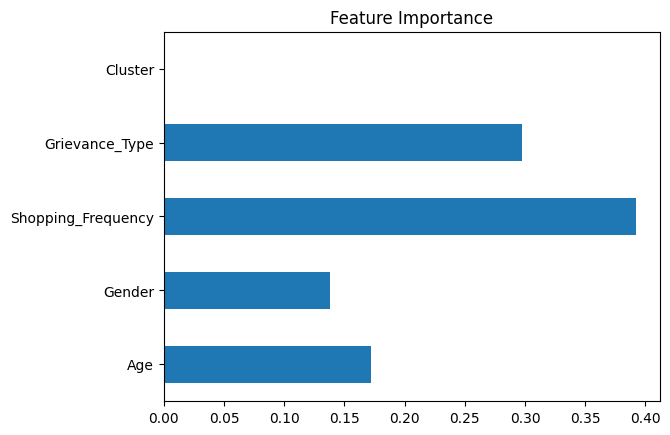


Logistic Regression Coefficients:

                    Coefficient
Age                    0.078111
Gender                 0.083511
Shopping_Frequency    -0.244688
Grievance_Type         0.818108
Cluster                0.000089


In [7]:
# =========================================================
# 1. IMPORT LIBRARIES
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# =========================================================
# 2. LOAD DATASET
# =========================================================
df = pd.read_csv("customer_grievances_T.csv")

print("Dataset Shape:", df.shape)
print(df)

# =========================================================
# 3. DATA PREPROCESSING
# =========================================================

# Handle missing values (new recommended syntax)
df = df.ffill()

# Encode categorical columns (INCLUDING Age)
encoder = LabelEncoder()
categorical_cols = [
    "Age",
    "Gender",
    "Shopping_Frequency",
    "Grievance_Type",
    "Satisfaction_Level"
]

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# =========================================================
# 4. STATISTICAL ANALYSIS
# =========================================================
print("\n--- Statistical Analysis ---")
print("Mean:\n", df.mean())
print("\nMedian:\n", df.median())
print("\nMode:\n", df.mode().iloc[0])

# =========================================================
# 5. CORRELATION & VISUALIZATION
# =========================================================

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x="Grievance_Type", data=df)
plt.title("Most Common Grievances")
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x="Age", hue="Grievance_Type", data=df)
plt.title("Grievances by Age Group")
plt.show()

# =========================================================
# 6. CLUSTERING (K-MEANS)
# =========================================================
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Age", "Satisfaction_Level"]])

plt.figure(figsize=(5,3))
plt.scatter(df["Age"], df["Satisfaction_Level"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Age Group")
plt.ylabel("Satisfaction Level")
plt.title("Customer Clustering")
plt.show()

# =========================================================
# 7. PREDICTIVE MODELING
# =========================================================
X = df.drop("Satisfaction_Level", axis=1)
y = df["Satisfaction_Level"]

# NO SMOTE – dataset is too small
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# =========================================================
# 8. MODEL TRAINING
# =========================================================
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

# =========================================================
# 9. FEATURE IMPORTANCE
# =========================================================
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.plot(kind="barh", title="Feature Importance")
plt.show()

# =========================================================
# 10. LOGISTIC REGRESSION
# =========================================================
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

coeff_df = pd.DataFrame(
    log_reg.coef_[0],
    index=X.columns,
    columns=["Coefficient"]
)

print("\nLogistic Regression Coefficients:\n")
print(coeff_df)
